# Chapter 1: Life Satisfaction

This notebook contains the code for chapter 1 of the Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow book.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Global configuration

In [2]:
BASE_PATH = "../data/"
BETTER_LIFE_INDEX_DATA_FILE = BASE_PATH + "oecd_bli_2015.csv"
GDP_PER_CAPITA_DATA_FILE = BASE_PATH + "gdp_per_capita.csv"

RANDOM_SEED = 42

In [3]:
np.random.seed(RANDOM_SEED)

## Load data

In [4]:
oecd_bli = pd.read_csv(BETTER_LIFE_INDEX_DATA_FILE, thousands=',')

In [5]:
gdp_per_capita = pd.read_csv(
    GDP_PER_CAPITA_DATA_FILE,
    thousands=',',
    delimiter='\t',
    encoding='latin1',
    na_values="n/a",
)

## Prepare data

In [6]:
def prepare_life_satisfaction_data(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
life_satisfaction = prepare_life_satisfaction_data(oecd_bli, gdp_per_capita)

In [8]:
X = np.c_[life_satisfaction["GDP per capita"]]
y = np.c_[life_satisfaction["Life satisfaction"]]

## Vizualize data

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

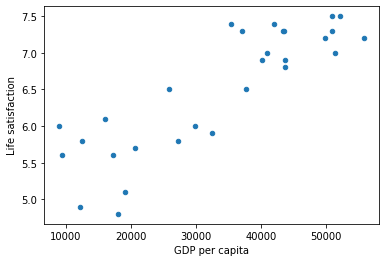

In [9]:
life_satisfaction.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

## Train <ins>linear regression</ins> model

In [10]:
lr_model = LinearRegression()

In [11]:
%%time
lr_model = lr_model.fit(X, y)

CPU times: user 236 µs, sys: 418 µs, total: 654 µs
Wall time: 551 µs


## Predict <ins>linear regression</ins>

In [12]:
lr_model.predict([[22587]])

array([[5.96242338]])

## Train <ins>k nearest neighbors</ins> model

In [13]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [14]:
%%time
knn_model = knn_model.fit(X, y)

CPU times: user 160 µs, sys: 283 µs, total: 443 µs
Wall time: 355 µs


## Predict <ins>k nearest neighbors</ins>

In [15]:
knn_model.predict([[22587]])

array([[5.76666667]])

# Exercises

1. How would you define Machine Learning?

**Solution**

Machine learning is giving a computer the ability to learn without the need for it to be explicitly programmed.

2. Can you name four types of problems where it shines?

**Solution**

1. Problems that require a lot of hand-tuning.
2. Complex problems that cannot be solved with traditional methods.
3. Fluctuating environments.
4. Insights about large amounts of data.

3. What is a labeled training set?

**Solution**

A dataset or part of a dataset that is used to train a supervised machine learning model. The dataset contains the value that the model needs to predict and a set of extra features used to predict this value.

4. What are the two most common supervised tasks?

**Solution**

1. Classification.
2. Regression.

5. Can you name four common unsupervised tasks?

**Solution**

1. Clustering.
2. Anomaly & novelty dection.
3. Visualization & dimension reduction.
4. Association rule learning.

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

**Solution**

Reinforcement Learning.

7. What type of algorithm would you use to segment your customers into multiple groups?

**Solution**

Clustering.

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

**Solution**

Supervised.

9. What is an online learning system?

**Solution**

An online learning system is a system where a machine learning model is continuously trained on new data.

10. What is out-of-core learning?

**Solution**

Out-of-core learning is the process of training a machine leraning model is trained in batches, usually because the training data is too large to fit in memory.

11. What type of learning algorithm relies on a similarity measure to make predictions?

**Solution**

An instance-based algorithm.

12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

**Solution**

A model parameter changes when a model is trained, a hyperparameter is set to a fixed value before training.

13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

**Solution**

Model-based learning algorithms search for patterns in the data and correlations between various attributes of the data.

The most common strategy model-based algorithms use to succeed is:

1. Study data.
2. Select model.
3. Train model & find parameters that minimize the the cost function.
4. Apply model to new data.

Predictions are made by passing input data to the model, then a prediction is made based on this data and the model parameters.

14. Can you name four of the main challenges in Machine Learning?

**Solution**

1. Insufficient quantity of data.
2. Non representative data.
3. Poor data quality.
4. Irrelevant features.

15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

**Solution**

Then the model is overfitting, this problem can be solved by:

1. Selecting a simpler model, reducing the attributes in the training data or constraining the model
2. Collect more training data
3. Reduce noise in training data

16. What is a test set and why would you want to use it?

**Solution**

A test set is a subset of the dataset that isn't used to train the model. The test is used to evaluate the model on data it has never seen before after it is trained and optimized.

17. What is the purpose of a validation set?

**Solution**

A validation set is a subset of the training set that is used optimize the model (e.g. trying out different hyperparameters or testing different learning algorithms) or evaluate multiple model to select the best one.

18. What can go wrong if you tune hyperparameters using the test set?

**Solution**

If you tune the hyperparameters using the test set the model will be optimized only for that particular set. So it will not generalize well to new data.

19. What is repeated cross-validation and why would you prefer it to using a single validation set?

**Solution**

Repeated cross-validation is the process of splitting up the validation set into $n$ groups, then each model is trained on all data minus one validation set that is used to evaluate the model.

By using a single validation set you run the risk of the model becoming optimized for only one validation set so it will not generalize well to new data. Therefore it is prefered to use repeated cross-validation.